In [22]:
from fluid import fluidsim


Added circular current to simulation.


In [27]:
from scipy.ndimage import gaussian_filter
?gaussian_filter
from scipy.ndimage import laplace
?laplace

Signature: laplace(input, output=None, mode='reflect', cval=0.0)
Docstring:
N-D Laplace filter based on approximate second derivatives.

Parameters
----------
input : array_like
    The input array.
output : array or dtype, optional
    The array in which to place the output, or the dtype of the
    returned array. By default an array of the same dtype as input
    will be created.
mode : str or sequence, optional
    The `mode` parameter determines how the input array is extended
    when the filter overlaps a border. By passing a sequence of modes
    with length equal to the number of dimensions of the input array,
    different modes can be specified along each axis. Default value is
    'reflect'. The valid values and their behavior is as follows:

    'reflect' (`d c b a | a b c d | d c b a`)
        The input is extended by reflecting about the edge of the last
        pixel. This mode is also sometimes referred to as half-sample
        symmetric.

    'constant' (`k k k k | a 

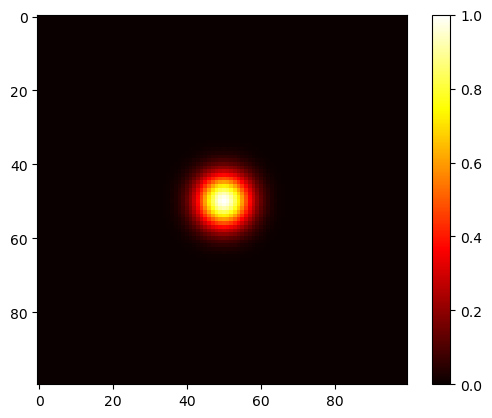

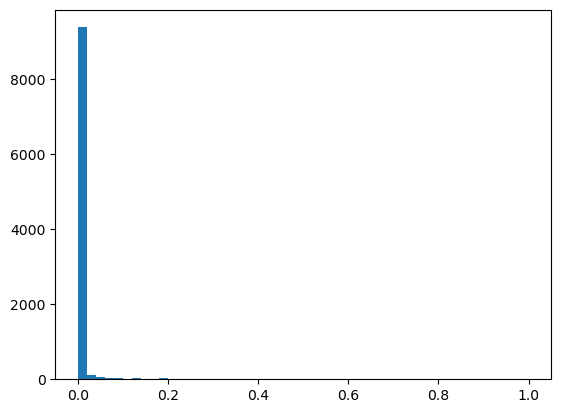

In [ ]:
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

class vector_field:
    def __init__(self, diffusion):
        self.boundary = None


class shaken_not_stirred:
    def __init__(self, diffusion, gridSize=100, timeStep=0.01):
        self.diffusion = diffusion
        self.gridSize = gridSize
        self.dt = timeStep
        self.grid = self.create_grid()
        self.drop_fluid(50, 50)

    def drop_fluid(self, x, y):
        """
        Drop a fluid modeled by a Gaussian at coordinates x, y in the grid
        """
        for i in range(self.gridSize):
            for j in range(self.gridSize):
                distance_squared = (i - x) ** 2 + (j - y) ** 2
                self.grid[i, j] += np.exp(-distance_squared / (2 * (self.gridSize * 0.05) ** 2))

    def create_grid(self):
        """
        Create a grid of size gridSize x gridSize with all values initialized to 0
        """
        return np.zeros((self.gridSize, self.gridSize))

    def update_vector_position(self, x, y):
        """
        Update the position of the vector in the grid
        """
        pass

    def update_diffusion_initial(self):
        """
        Update the grid using the diffusion equation
        and finite difference method.
        """
        dx = 1  # Assuming a grid spacing of 1 for simplicity
        laplacian = (
            np.roll(self.grid, 1, axis=0) + np.roll(self.grid, -1, axis=0) +
            np.roll(self.grid, 1, axis=1) + np.roll(self.grid, -1, axis=1) -
            4 * self.grid
        ) / dx**2

        self.grid = self.grid + self.diffusion * self.dt * laplacian

    def update_diffusion_laplace(self):
        """
        Update the grid using the diffusion equation
        and finite difference method.
        """
        dx = 1  # Assuming a grid spacing of 1 for simplicity
        laplacian = laplace(self.grid, mode='wrap') / dx**2
        self.grid = self.grid + self.diffusion * self.dt * laplacian

    def update_diffusion_gauss(self):
        """
        Update the grid using a Gaussian filter for diffusion
        """
        self.grid = gaussian_filter(self.grid, sigma=0.1)

    def plot(self):
        """
        Plot the grid using matplotlib
        """
        plt.imshow(self.grid, cmap='hot', interpolation='nearest')
        plt.colorbar()
        plt.show()

    def plot_distribution(self):
        """
        Plot the distribution of the grid
        """
        plt.hist(self.grid.flatten(), bins=50)
        plt.show()


# Ensure the code works with the existing variables in the notebook
if __name__ == "__main__":
    simulation = shaken_not_stirred(diffusion, gridSize, timeStep)
    for _ in range(500 - i):  # Continue the simulation from the current state
        simulation.update_diffusion_initial()
    simulation.plot()
    simulation.plot_distribution()
